<a href="https://www.kaggle.com/code/akashrajnigam/transactionanalysis?scriptVersionId=178993170" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/retail-transaction-dataset/Retail_Transaction_Dataset.csv


In [2]:
data = pd.read_csv('/kaggle/input/retail-transaction-dataset/Retail_Transaction_Dataset.csv')

In [3]:
data.head(15)

,CustomerID,ProductID,Quantity,Price,TransactionDate,PaymentMethod,StoreLocation,ProductCategory,DiscountApplied(%),TotalAmount
0,109318,C,7,80.079844,12/26/2023 12:32,Cash,"176 Andrew Cliffs\nBaileyfort, HI 93354",Books,18.677100,455.862764
1,993229,C,4,75.195229,8/5/2023 0:00,Cash,"11635 William Well Suite 809\nEast Kara, MT 19483",Home Decor,14.121365,258.306546
2,579675,A,8,31.528816,3/11/2024 18:51,Cash,"910 Mendez Ville Suite 909\nPort Lauraland, MO...",Books,15.943701,212.015651
3,799826,D,5,98.880218,10/27/2023 22:00,PayPal,"87522 Sharon Corners Suite 500\nLake Tammy, MO...",Books,6.686337,461.343769
4,121413,A,7,93.188512,12/22/2023 11:38,Cash,"0070 Michelle Island Suite 143\nHoland, VA 80142",Electronics,4.030096,626.030484
5,463050,D,3,54.093152,8/15/2023 4:24,Cash,"8492 Jonathan Drive\nNorth Robertshire, TN 67532",Electronics,10.888768,144.609223
6,888163,D,7,13.121937,12/26/2023 5:32,PayPal,USNV Harrell\nFPO AA 62814,Clothing,16.295127,76.885907
7,843385,A,8,56.025164,10/11/2023 6:48,Debit Card,"489 Juan Loop Apt. 093\nNorth Brettville, WV 7...",Home Decor,6.344306,419.766052
8,839609,B,5,23.857981,2/27/2024 11:13,Credit Card,528 Justin Expressway Apt. 336\nCabreraborough...,Electronics,18.703997,96.977925
9,184135,D,4,63.342777,11/5/2023 1:46,Debit Card,"189 Wright Mews\nMartinfurt, MO 75932",Books,7.640607,234.012018


In [4]:
data.shape

(100000, 10)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CustomerID          100000 non-null  int64  
 1   ProductID           100000 non-null  object 
 2   Quantity            100000 non-null  int64  
 3   Price               100000 non-null  float64
 4   TransactionDate     100000 non-null  object 
 5   PaymentMethod       100000 non-null  object 
 6   StoreLocation       100000 non-null  object 
 7   ProductCategory     100000 non-null  object 
 8   DiscountApplied(%)  100000 non-null  float64
 9   TotalAmount         100000 non-null  float64
dtypes: float64(3), int64(2), object(5)
memory usage: 7.6+ MB


In [6]:
data.columns

Index(['CustomerID', 'ProductID', 'Quantity', 'Price', 'TransactionDate',
       'PaymentMethod', 'StoreLocation', 'ProductCategory',
       'DiscountApplied(%)', 'TotalAmount'],
      dtype='object')

<h2> Checking Values and their unique count and values</h2>

In [7]:
for column in data.columns:
   print(column,data[column].unique(),len(data[column].unique()), end='\n\n\n')

CustomerID [109318 993229 579675 ... 887304 326401 771566] 95215


ProductID ['C' 'A' 'D' 'B'] 4


Quantity [7 4 8 5 3 6 2 1 9] 9


Price [80.07984415 75.19522942 31.52881648 ... 72.38556379 66.54223948
 38.08776628] 100000


TransactionDate ['12/26/2023 12:32' '8/5/2023 0:00' '3/11/2024 18:51' ...
 '7/17/2023 16:59' '8/25/2023 7:59' '2/4/2024 11:53'] 91025


PaymentMethod ['Cash' 'PayPal' 'Debit Card' 'Credit Card'] 4


StoreLocation ['176 Andrew Cliffs\nBaileyfort, HI 93354'
 '11635 William Well Suite 809\nEast Kara, MT 19483'
 '910 Mendez Ville Suite 909\nPort Lauraland, MO 99563' ...
 '50653 Kara Lakes\nStephanieborough, RI 94492'
 '18756 Mcfarland Way Suite 866\nBarnettside, PR 50529'
 '8046 Hull Drive\nPaulstad, GU 87218'] 100000


ProductCategory ['Books' 'Home Decor' 'Electronics' 'Clothing'] 4


DiscountApplied(%) [18.6770995  14.12136502 15.94370066 ... 17.42397944 14.34501785
  2.96605804] 100000


TotalAmount [455.8627638 258.3065464 212.0156509 ... 239.0924721 284.9837168


In [8]:
data.describe()

,CustomerID,Quantity,Price,DiscountApplied(%),TotalAmount
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,500463.982180,5.009290,55.067344,10.020155,248.334955
std,288460.917524,2.579808,25.971567,5.779534,184.554792
min,14.000000,1.000000,10.000430,0.000046,8.274825
25%,250693.750000,3.000000,32.549474,5.001013,95.163418
50%,499679.000000,5.000000,55.116789,10.030353,200.368393
75%,751104.750000,7.000000,77.456763,15.018367,362.009980
max,999997.000000,9.000000,99.999284,19.999585,896.141242


<h3>From the above description we can see that:</h3><br>
* Minimum amount spent on transaction is rupees 8.274825 and maximum amount spent is 896.141242.<br>
* Minimum dicount applied is 0.000046% and maximum dicount applied is 19.999585%.<br>
* Maximum quantity purchased were 9<br>
* Price for rach product ranges between 10 and 100.<br>
* There are 4 product categories for selling naming: 'Books', 'Home Decor', 'Electronics', 'Clothing'.<br>
* There are 4 payment methods naming: 'Cash', 'PayPal', 'Debit Card', 'Credit Card'.<br>

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CustomerID          100000 non-null  int64  
 1   ProductID           100000 non-null  object 
 2   Quantity            100000 non-null  int64  
 3   Price               100000 non-null  float64
 4   TransactionDate     100000 non-null  object 
 5   PaymentMethod       100000 non-null  object 
 6   StoreLocation       100000 non-null  object 
 7   ProductCategory     100000 non-null  object 
 8   DiscountApplied(%)  100000 non-null  float64
 9   TotalAmount         100000 non-null  float64
dtypes: float64(3), int64(2), object(5)
memory usage: 7.6+ MB


<h2>Converting TransactionDate column to TIme, Year, Month & Day for further analysis</h2>

In [10]:
data['Date'] = pd.to_datetime(data['TransactionDate'],errors= 'coerce').dt.date
data['Time'] = pd.to_datetime(data['TransactionDate']).dt.time

In [11]:
data[['TransactionDate', 'Date', 'Time']].head()

,TransactionDate,Date,Time
0,12/26/2023 12:32,2023-12-26,12:32:00
1,8/5/2023 0:00,2023-08-05,00:00:00
2,3/11/2024 18:51,2024-03-11,18:51:00
3,10/27/2023 22:00,2023-10-27,22:00:00
4,12/22/2023 11:38,2023-12-22,11:38:00


In [12]:
# data['Date'] = data['Date'].dt.strftime('%Y-%m-%d')
data['Year'], data['Month'], data['Day'] = pd.to_datetime(data['Date']).dt.year, pd.to_datetime(data['Date']).dt.month,pd.to_datetime(data['Date']).dt.day 

In [13]:
data.drop(columns = ['Date','TransactionDate'], axis = 1, inplace = True)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CustomerID          100000 non-null  int64  
 1   ProductID           100000 non-null  object 
 2   Quantity            100000 non-null  int64  
 3   Price               100000 non-null  float64
 4   PaymentMethod       100000 non-null  object 
 5   StoreLocation       100000 non-null  object 
 6   ProductCategory     100000 non-null  object 
 7   DiscountApplied(%)  100000 non-null  float64
 8   TotalAmount         100000 non-null  float64
 9   Time                100000 non-null  object 
 10  Year                100000 non-null  int32  
 11  Month               100000 non-null  int32  
 12  Day                 100000 non-null  int32  
dtypes: float64(3), int32(3), int64(2), object(5)
memory usage: 8.8+ MB


In [15]:
for column in data.columns:
   print(column,data[column].unique(),len(data[column].unique()), end='\n\n\n')

CustomerID [109318 993229 579675 ... 887304 326401 771566] 95215


ProductID ['C' 'A' 'D' 'B'] 4


Quantity [7 4 8 5 3 6 2 1 9] 9


Price [80.07984415 75.19522942 31.52881648 ... 72.38556379 66.54223948
 38.08776628] 100000


PaymentMethod ['Cash' 'PayPal' 'Debit Card' 'Credit Card'] 4


StoreLocation ['176 Andrew Cliffs\nBaileyfort, HI 93354'
 '11635 William Well Suite 809\nEast Kara, MT 19483'
 '910 Mendez Ville Suite 909\nPort Lauraland, MO 99563' ...
 '50653 Kara Lakes\nStephanieborough, RI 94492'
 '18756 Mcfarland Way Suite 866\nBarnettside, PR 50529'
 '8046 Hull Drive\nPaulstad, GU 87218'] 100000


ProductCategory ['Books' 'Home Decor' 'Electronics' 'Clothing'] 4


DiscountApplied(%) [18.6770995  14.12136502 15.94370066 ... 17.42397944 14.34501785
  2.96605804] 100000


TotalAmount [455.8627638 258.3065464 212.0156509 ... 239.0924721 284.9837168
 184.7903051] 99998


Time [datetime.time(12, 32) datetime.time(0, 0) datetime.time(18, 51) ...
 datetime.time(12, 44) datetime.time(7, 

In [16]:
data.head()

,CustomerID,ProductID,Quantity,Price,PaymentMethod,StoreLocation,ProductCategory,DiscountApplied(%),TotalAmount,Time,Year,Month,Day
0,109318,C,7,80.079844,Cash,"176 Andrew Cliffs\nBaileyfort, HI 93354",Books,18.677100,455.862764,12:32:00,2023,12,26
1,993229,C,4,75.195229,Cash,"11635 William Well Suite 809\nEast Kara, MT 19483",Home Decor,14.121365,258.306546,00:00:00,2023,8,5
2,579675,A,8,31.528816,Cash,"910 Mendez Ville Suite 909\nPort Lauraland, MO...",Books,15.943701,212.015651,18:51:00,2024,3,11
3,799826,D,5,98.880218,PayPal,"87522 Sharon Corners Suite 500\nLake Tammy, MO...",Books,6.686337,461.343769,22:00:00,2023,10,27
4,121413,A,7,93.188512,Cash,"0070 Michelle Island Suite 143\nHoland, VA 80142",Electronics,4.030096,626.030484,11:38:00,2023,12,22


In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

<h2>Q1. Which Payment Method is popular or most used?
</h2>

In [18]:
data_pm = data.groupby('PaymentMethod')

In [19]:
data_pm.first()

,CustomerID,ProductID,Quantity,Price,StoreLocation,ProductCategory,DiscountApplied(%),TotalAmount,Time,Year,Month,Day
PaymentMethod,,,,,,,,,,,,
Cash,109318,C,7,80.079844,"176 Andrew Cliffs\nBaileyfort, HI 93354",Books,18.677100,455.862764,12:32:00,2023,12,26
Credit Card,839609,B,5,23.857981,528 Justin Expressway Apt. 336\nCabreraborough...,Electronics,18.703997,96.977925,11:13:00,2024,2,27
Debit Card,843385,A,8,56.025164,"489 Juan Loop Apt. 093\nNorth Brettville, WV 7...",Home Decor,6.344306,419.766052,06:48:00,2023,10,11
PayPal,799826,D,5,98.880218,"87522 Sharon Corners Suite 500\nLake Tammy, MO...",Books,6.686337,461.343769,22:00:00,2023,10,27


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

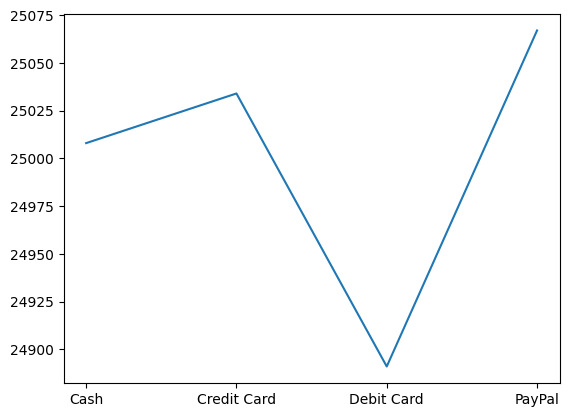

In [20]:
sns.lineplot(x=list(key for key in data_pm.groups.keys()), y = list(data_pm['TotalAmount'].count()))
# sns.lineplot(x=list(key for key in data_pm.groups.keys()), y = list(data_pm['Quantity'].count()), palette="Blues")

<h3>From the above graph we can see that debit card is the most not very popular among other options. PayPal is the most popular amon all of them.</h3>

<h2>Q2. Which payment method offers more discount?</h2>

In [21]:
data_pm["DiscountApplied(%)"].mean()

PaymentMethod
Cash           10.033018
Credit Card    10.031163
Debit Card     10.008069
PayPal         10.008328
Name: DiscountApplied(%), dtype: float64

In [22]:
data_pm["DiscountApplied(%)"].sum()

PaymentMethod
Cash           250905.711760
Credit Card    251120.136552
Debit Card     249110.857851
PayPal         250878.747754
Name: DiscountApplied(%), dtype: float64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


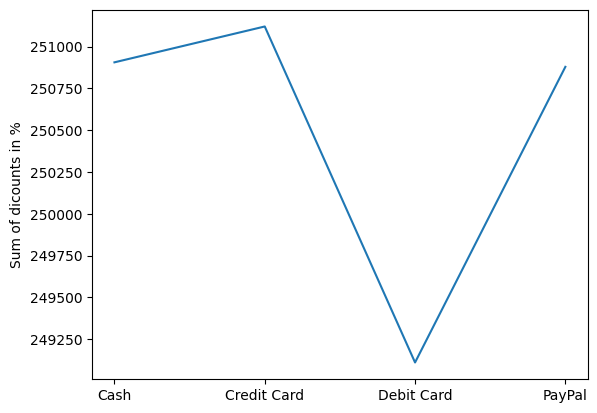

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


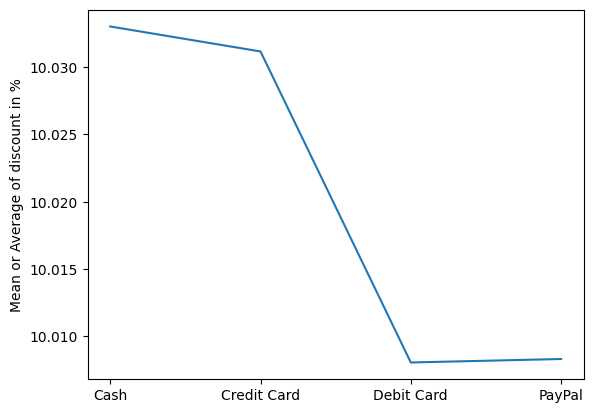

In [23]:
sns.lineplot(x=list(key for key in data_pm.groups.keys()), y = list(data_pm["DiscountApplied(%)"].sum()))
plt.ylabel('Sum of dicounts in %')
plt.show()
sns.lineplot(x=list(key for key in data_pm.groups.keys()), y = list(data_pm["DiscountApplied(%)"].mean()))
plt.ylabel('Mean or Average of discount in %')
plt.show()

<h3>From the above plots we can see that cumulatively credit card offered more than 251000% discunt whereas the second plot shows cash payment offers the highest average discount per customer with more than 10.03%</h3><h3>With this it is clear that credit card and cash both offer at par discounts.</h3>

<h2>Q3. Which Product Category is most selling?</h2>

In [24]:
data_pc = data.groupby('ProductCategory')

In [25]:
data_pc.first()

,CustomerID,ProductID,Quantity,Price,PaymentMethod,StoreLocation,DiscountApplied(%),TotalAmount,Time,Year,Month,Day
ProductCategory,,,,,,,,,,,,
Books,109318,C,7,80.079844,Cash,"176 Andrew Cliffs\nBaileyfort, HI 93354",18.677100,455.862764,12:32:00,2023,12,26
Clothing,888163,D,7,13.121937,PayPal,USNV Harrell\nFPO AA 62814,16.295127,76.885907,05:32:00,2023,12,26
Electronics,121413,A,7,93.188512,Cash,"0070 Michelle Island Suite 143\nHoland, VA 80142",4.030096,626.030484,11:38:00,2023,12,22
Home Decor,993229,C,4,75.195229,Cash,"11635 William Well Suite 809\nEast Kara, MT 19483",14.121365,258.306546,00:00:00,2023,8,5


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


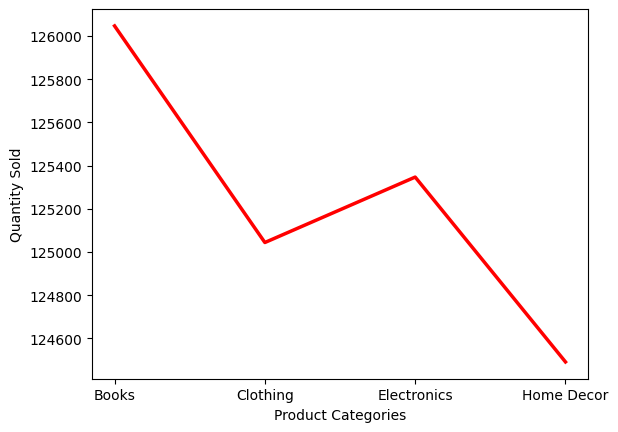

In [26]:
sns.lineplot(x='ProductCategory', y ='Quantity', data = data_pc["Quantity"].sum().reset_index(), color = 'red', linewidth = 2.5)
plt.ylabel('Quantity Sold')
plt.xlabel('Product Categories')
plt.show()

<h3>From the above plot we can see that most sales happened for books.</h3>

In [27]:
# sns.lineplot(x="PaymentMethod", y = "count", data = data_pm['ProductCategory'].value_counts().reset_index())

<h2>Q4. Which Payment Method is more used for which type of Product Category?</h2>

<Figure size 1000x5000 with 0 Axes>

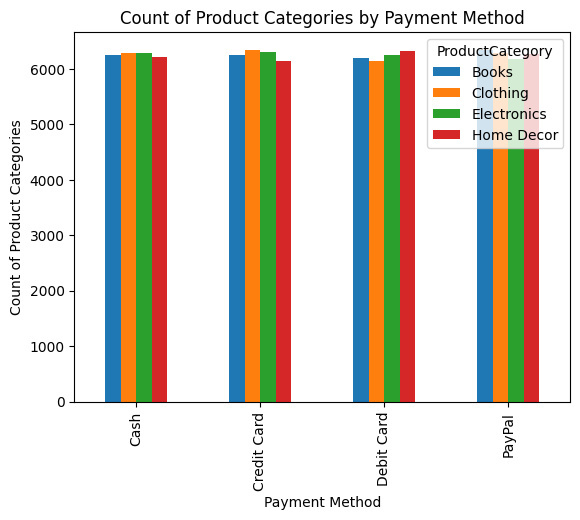

In [28]:
data_pm2 = data.groupby(['PaymentMethod', 'ProductCategory']).size().unstack(fill_value=0)
plt.figure(figsize = (10, 50))
# Plot the data
data_pm2.plot(kind='bar', stacked=False)
plt.xlabel('Payment Method')
plt.ylabel('Count of Product Categories')
plt.title('Count of Product Categories by Payment Method')
plt.show()

<h2>Q5. What is the percentage of transactions performed in year 2023 and 2024?</h2>

In [29]:
data.groupby('Year')['Month'].unique()

Year
2023    [12, 8, 10, 11, 9, 6, 5, 7, 4]
2024                      [3, 2, 4, 1]
Name: Month, dtype: object

<h3>Year   [Months for which transaction data is available]<br><br>
2023       [12, 8, 10, 11, 9, 6, 5, 7, 4]<br><br>
2024                       [3, 2, 4, 1]</h3>

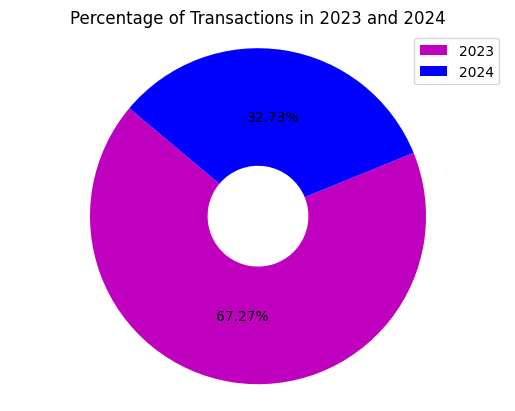

In [30]:
# plt.figure(figsize=(20,5))
plt.pie(data.groupby('Year').size(), autopct='%1.2f%%', startangle=140, colors ='mb', wedgeprops=dict(width=0.7))
plt.legend(list(key for key in data['Year'].unique()))
plt.title('Percentage of Transactions in 2023 and 2024')
plt.axis('equal')
plt.show()

<H2>Q6. Which PaymentMethod has highest amount of transaction till now?</H2>

In [31]:
data_pm['TotalAmount'].sum().reset_index()

,PaymentMethod,TotalAmount
0,Cash,6.207206e+06
1,Credit Card,6.203538e+06
2,Debit Card,6.202999e+06
3,PayPal,6.219753e+06


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


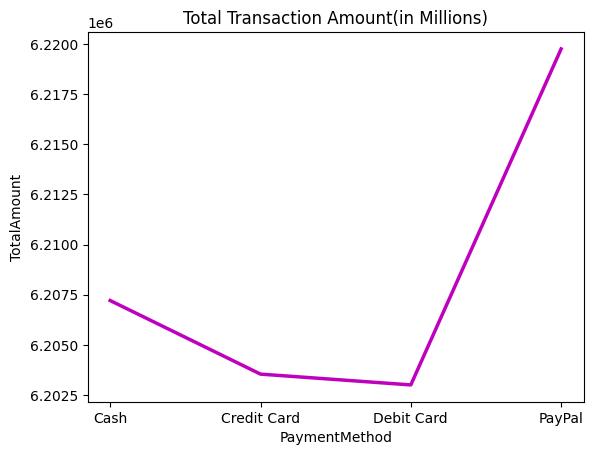

In [32]:
# plt.barh(y = 'PaymentMethod', data = data_pm['TotalAmount'].sum().reset_index(), width = 0.6)
sns.lineplot(y = 'TotalAmount', x = 'PaymentMethod', data = data_pm['TotalAmount'].sum().reset_index(), linewidth = 2.5, color = 'm')
plt.title('Total Transaction Amount(in Millions)')
plt.show()

<h3>PayPal has the highest transaction amount between 2023 and 2024 with the amount more than 6.22 millions.</h3>

<h1>Analysis Conclusion</h1>
<h3>The conclusion of the analysis contains following points:
<ul>
    <li>The data is normally distributed.</li>
    <li>Each payment method is famous for different payment category the gap in their usage is not much.</li>
    </ul></h3>